## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [ ]:
x=np.linspace(0,20,50)
print(len(x))

50


In [ ]:
a=-2
b=1
y=a*x+b
print(y)

[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.67346939
 -23.48979592 -24.30612245 -25.12244898 -25.93877551 -26.75510204
 -27.57142857 -28.3877551  -29.20408163 -30.02040816 -30.83673469
 -31.65306122 -32.46938776 -33.28571429 -34.10204082 -34.91836735
 -35.73469388 -36.55102041 -37.36734694 -38.18367347 -39.        ]


#### Plot your data points. 

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

![image.png](attachment:image.png)

#### γ takes values between 0 and 1.
![image.png](attachment:image.png)

In [ ]:
def h(x,th0,th1):
  return th0+th1*x
  

In [ ]:
def cost(x,y,th0,th1):
  hypo = h(x,th0,th1)
  m = len(hypo)
  return sum((hypo-y)**2)/(2*m)

In [ ]:
def lin_reg(x,y,theta0,theta1,lr,max_iteration,gamma):   
    theta0=0
    theta1=0
    j2 = cost(x,y,theta0,theta1)
    j1=10**10                       
    n=0
    m=len(x)                        
    v0=0
    v1=0
    n=0
    it=[]
    jlist=[]
    th0list=[]
    th1list=[]
    while abs(j2-j1)>=0.000001 and n< max_iteration:
        v0=gamma*v0+lr*sum(h(x,theta0,theta1)-y)/(m)
        v1=gamma*v1+lr*sum((h(x,theta0,theta1)-y)*x)/(m)
        theta0=theta0-v0       #update thetas
        theta1=theta1-v1       #update thetas
        th0list.append(theta0)
        th1list.append(theta1)
        it.append(n)
        j1=j2
        j2= cost(x,y,theta0,theta1)
        jlist.append(j2)
        n+=1
        
    print(n)
    return it,jlist,th0list,th1list,theta0,theta1

In [ ]:
it,jlist,th0list,th1list,th0,th1=lin_reg(x, y, 0, 0,0.02, 1000 , 0.9)

182


In [ ]:
print("R2 score is",r2_score(y,h(x,th0,th1)))

R2 score is 0.9999999592866613


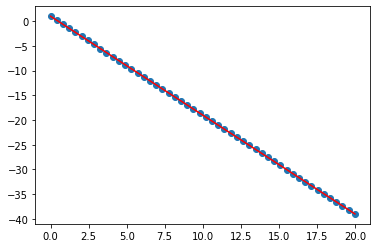

In [ ]:
plt.scatter(x,y)
plt.plot(x,h(x,th0,th1) , c = "r")
plt.show()

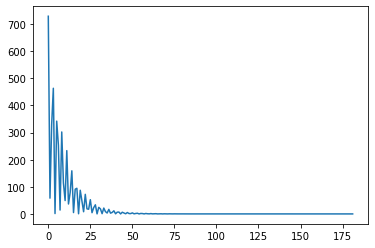

In [ ]:
plt.plot(jlist);

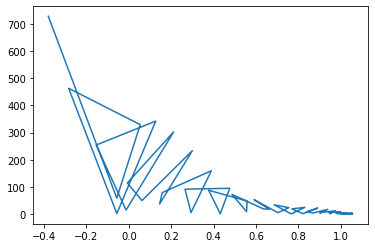

In [ ]:
plt.plot(th0list,jlist);

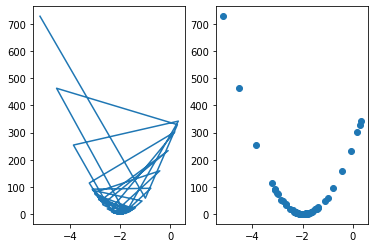

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(th1list,jlist);
plt.subplot(1, 2, 2)
plt.scatter(th1list,jlist);

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [ ]:
it,jlist,th0list,th1list,th0,th1=lin_reg(x, y, 0, 0,0.02, 1000 , 0.99)
print("R2 score is",r2_score(y,h(x,th0,th1)))

1000
R2 score is 0.9995347228145528


In [ ]:
it,jlist,th0list,th1list,th0,th1=lin_reg(x, y, 0, 0,0.02, 1000 , 1)
print("R2 score is",r2_score(y,h(x,th0,th1)))

1000
R2 score is -0.3887194852649163


In [ ]:
it,jlist,th0list,th1list,th0,th1=lin_reg(x, y, 0, 0,0.02, 1000 , 0);
print("R2 score is",r2_score(y,h(x,th0,th1)));

654
R2 score is -inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


### Update your Batch GD for one variable  implementation to be NAG and check your results

![image.png](attachment:image.png)

In [ ]:
def lin_reg(x,y,theta0,theta1,lr,max_iteration,gamma):   
    theta0=0
    theta1=0
    j2 = cost(x,y,theta0,theta1)
    j1=10**10                       
    n=0
    m=len(x)                        
    v0=0
    v1=0
    n=0
    it=[]
    jlist=[]
    th0list=[]
    th1list=[]
    while abs(j2-j1)>=0.000001 and n< max_iteration:
        theta0t=theta0-gamma*v0       
        theta1t=theta1-gamma*v1   
        theta0=theta0t-lr*sum(h(x,theta0t,theta1t)-y)/(m)
        theta1=theta1t-lr*sum((h(x,theta0t,theta1t)-y)*x)/(m)
        v0=gamma*v0+lr*sum(h(x,theta0t,theta1t)-y)/(m)
        v1=gamma*v1+lr*sum((h(x,theta0t,theta1t)-y)*x)/(m)
        th0list.append(theta0)
        th1list.append(theta1)
        it.append(n)
        j1=j2
        j2= cost(x,y,theta0,theta1)
        jlist.append(j2)
        n+=1
        
    print(n)
    return it,jlist,th0list,th1list,theta0,theta1

In [ ]:
it,jlist,th0list,th1list,th0,th1=lin_reg(x, y, 0, 0,0.02, 1000 , 0.99)
print("R2 score is",r2_score(y,h(x,th0,th1)))

262
R2 score is -inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:805: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [ ]:
it,jlist,th0list,th1list,th0,th1=lin_reg(x, y, 0, 0,0.001, 1000 , 0.99)
print("R2 score is",r2_score(y,h(x,th0,th1)))

413
R2 score is 0.9999658330759464


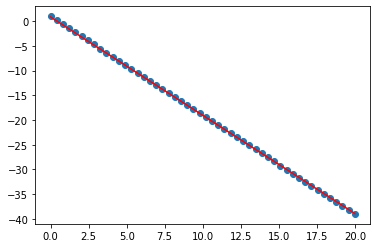

In [ ]:
plt.scatter(x,y)
plt.plot(x,h(x,th0,th1) , c = "r")

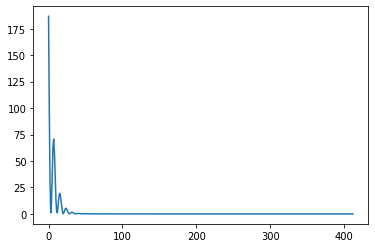

In [ ]:
plt.plot(jlist)

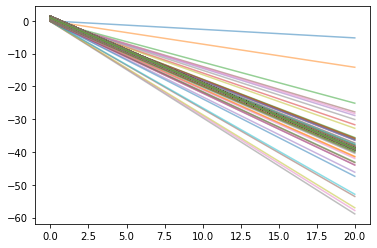

In [ ]:
plt.scatter(x,y)
for i in range(0,len(th0list)):
    plt.plot(x,h(x,th0list[i],th1list[i]) ,alpha=0.5)

## Congratulations 
![image.png](attachment:image.png)